# Predicting Water Potability Using Machine Learning

### Analyzing open-source water quality data to classify whether water is potable (safe for drinking) based on physicochemical features. The workflow includes data ingestion, cleaning, feature engineering, model training and evaluation, and presentation of results through reports and visualizations to aid in public health insights.

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## 2. Load Dataset

In [12]:
# Use the raw link to the CSV file
url = "https://raw.githubusercontent.com/Sarthak-1408/Water-Potability/main/water_potability.csv"
df = pd.read_csv(url)

print("Initial Data Overview:")
print(df.head())


Initial Data Overview:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


## Check for Missing Values


In [13]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


## Impute Missing Values with KNN Imputer

In [15]:
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.655223,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,351.285226,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,347.323743,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,368.086095,392.449580,19.903225,56.689055,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,316.571962,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,334.293598,402.883113,11.168946,77.488213,4.708658,1.0


## Exploratory Data Analysis (EDA)

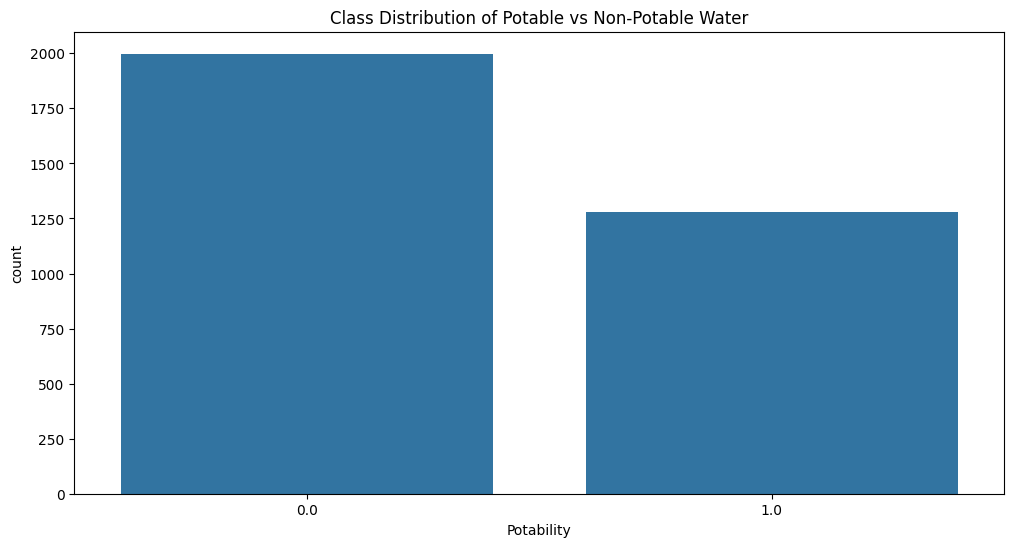

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Potability', data=df_imputed)
plt.title('Class Distribution of Potable vs Non-Potable Water')
plt.show()

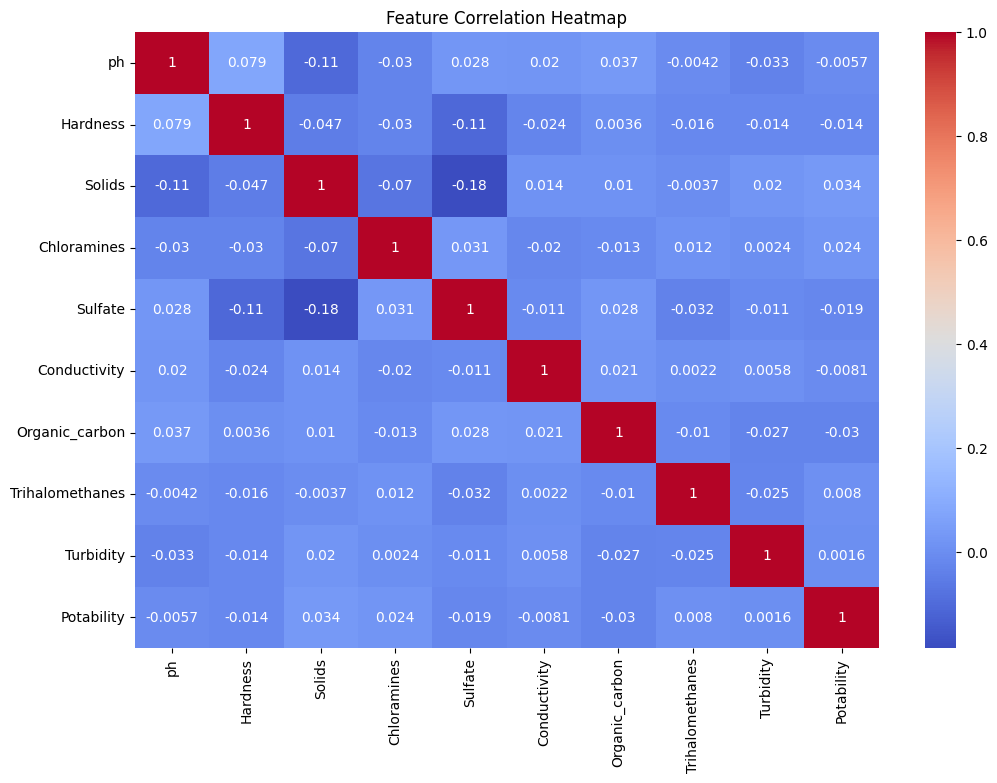

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Feature Engineering (e.g., scaling)

In [18]:
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

In [20]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.4753731 , 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

## Split Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train Models

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    model_results[name] = (auc, model)
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("ROC AUC:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))



Logistic Regression Results:
Accuracy: 0.6280487804878049
ROC AUC: 0.5
Confusion Matrix:
 [[412   0]
 [244   0]]
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Results:
Accuracy: 0.6966463414634146
ROC AUC: 0.6331569314021964
Confusion Matrix:
 [[363  49]
 [150  94]]
              precision    recall  f1-score   support

         0.0       0.71      0.88      0.78       412
         1.0       0.66      0.39      0.49       244

    accuracy                           0.70       656
   macro avg       0.68      0.63      0.64       656
weighted avg       0.69      0.70      0.67       656



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:06:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.6509146341463414
ROC AUC: 0.6009271048862008
Confusion Matrix:
 [[328  84]
 [145  99]]
              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74       412
         1.0       0.54      0.41      0.46       244

    accuracy                           0.65       656
   macro avg       0.62      0.60      0.60       656
weighted avg       0.64      0.65      0.64       656



## ROC Curve for Best Model (based on highest AUC)

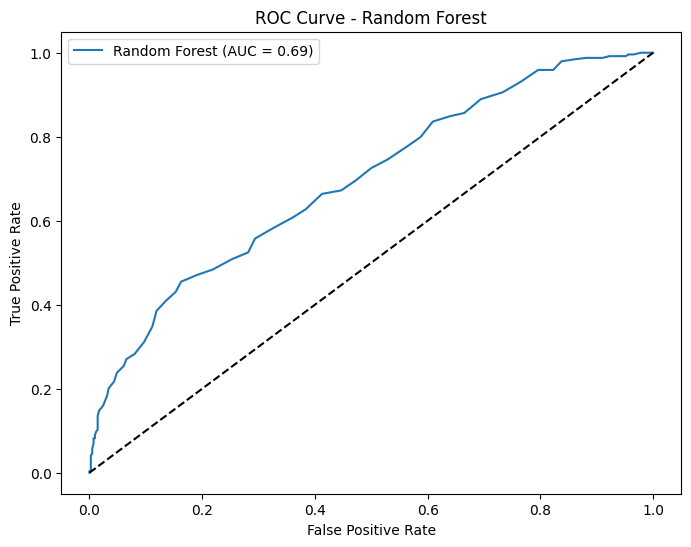

In [25]:
best_model_name = max(model_results, key=lambda k: model_results[k][0])
best_model = model_results[best_model_name][1]
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend()
plt.show()

## Save Cleaned Data and Results

In [26]:
cleaned_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])
cleaned_df['Potability'] = y
cleaned_df.to_csv('cleaned_water_potability.csv', index=False)

In [27]:
print("\nCleaned data saved as 'cleaned_water_potability.csv'")



Cleaned data saved as 'cleaned_water_potability.csv'
